<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hurst-exponent" data-toc-modified-id="Hurst-exponent-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hurst exponent</a></span></li><li><span><a href="#Variance-ratio-test" data-toc-modified-id="Variance-ratio-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variance-ratio test</a></span></li></ul></div>

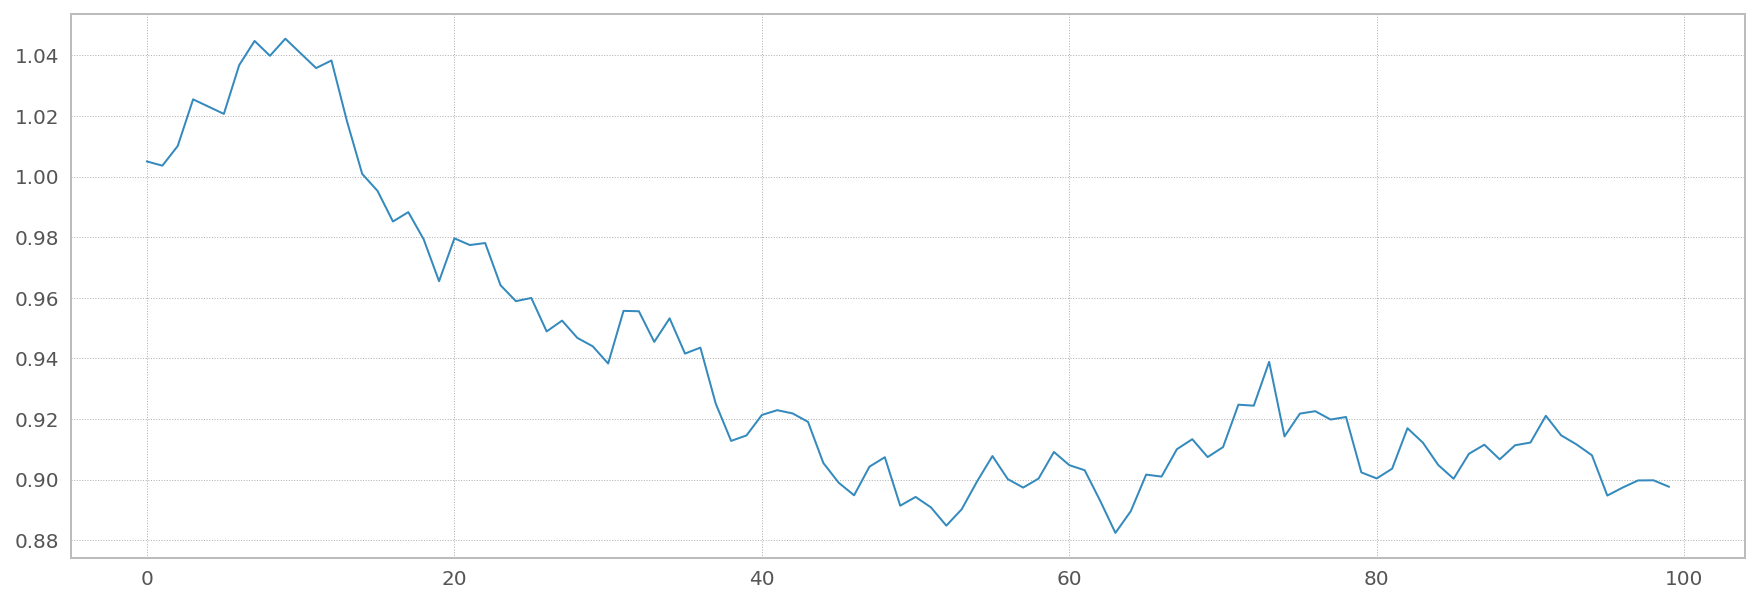

In [1]:
np.random.seed(42)
x = np.random.randn(100)/100 + 1
p = np.cumprod(x)
plt.plot(p);

# Hurst exponent

In [2]:
# %%writefile hurst.py
import numpy as np
from scipy.stats import linregress


def hurst(p, l):
    """
    Arguments:
        p: ndarray -- the price series to be tested
        l: list of integers or an integer -- lag(s) to test for mean reversion
    Returns:
        Hurst exponent
    """
    if isinstance(l, int):
        lags = [1, l]
    else:
        lags = l
    assert lags[-1] >=2, "Lag in prices must be greater or equal 2"
    print(f"Price lags of {lags[1:]} are included")
    lp = np.log(p)
    var = [np.var(lp[l:] - lp[:-l]) for l in lags]
    hr = linregress(np.log(lags), np.log(var))[0] / 2
    return hr


hurst(p, 2)

Price lags of [2] are included


0.4915859809091285

1. For a price series exhibiting a geometric random walk, H = 0.5
2. As H decreases towards zero, the speed of diffusion reduces, meaning the price
series is more mean-reverting
3. Contrarily, as H increases toward 1, the price series is increasingly trending

> The Hurst exponent can thus be interpreted as an indicator of the degree of mean-reversion or trendiness.

# Variance-ratio test

In [3]:
from arch.unitroot import VarianceRatio
VarianceRatio(np.log(p))

Test Statistic,-0.014
P-value,0.989
Lags,2
